<a href="https://colab.research.google.com/github/bellepoque7/2023-data-science-edu/blob/main/Pandas_%EB%B3%B5%EC%8A%B5%EB%B0%8F%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 프로젝트 목표
---
1. Pandas 복습
2. Pandas를 활용한 데이터셋 불러오기
3. 타이타닉 데이터 EDA

---
### 라이브러리 불러오기
 - **pandas**: 데이터프레임을 다루기 위한 라이브러리
 - **matplotlib.pyplot**: 데이터시각화를 위한 라이브러리
 - **seaborn**: 데이터시각화를 위한 라이브러리
 - **numpy**: 고성능 수치연산을 위한 라이브러리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

## 1. Pandas 복습
---


### 1.1 create

데이터 프레임에 컬럼 이름을 설정하여 새로 생성합니다.

In [ ]:
df = pd.DataFrame(columns=["Email", "Name"])
df

,Email,Name


In [ ]:
df = pd.DataFrame(columns=["Email", "Name"])
df["Name"] = ["doori", "minsu"]
df["Email"] = ["dr@gmail.com", "ms@gmail.com"]
print(df)
print(type(df["Name"]))

          Email   Name
0  dr@gmail.com  doori
1  ms@gmail.com  minsu
<class 'pandas.core.series.Series'>


컬럼에 데이터를 삽입합니다.

In [ ]:
df["Name"] = ["fcamp", "dss"]
df["Email"] = ["fcamp@gmail.com", "dss@gmail.com"]
df

,Email,Name
0,fcamp@gmail.com,fcamp
1,dss@gmail.com,dss


컬럼데이터를 확인하면 Series 데이터임을 확인할 수 있습니다.

In [ ]:
type(df["Name"])

pandas.core.series.Series

In [ ]:
df["Email"]

0    fcamp@gmail.com
1      dss@gmail.com
Name: Email, dtype: object

#### 2.1.2 딕셔너리 데이터 타입을 Dataframe으로 만드는 방법

In [ ]:
name = ["doori", "minsu"]
email = ["dr@gmail.com", "ms@gmail.com"]
ids = [1, 2]
dic = {"Name":name, "Email":email, "id": ids}
df = pd.DataFrame(dic)
print(df)

    Name         Email  id
0  doori  dr@gmail.com   1
1  minsu  ms@gmail.com   2


In [ ]:
df

,Name,Email,id
0,doori,dr@gmail.com,1
1,minsu,ms@gmail.com,2


#### 2.1.3 인덱스를 수정하는 방법

In [ ]:
index_list = ["one", "two"]
df = pd.DataFrame(dic, index=index_list)
print(df)

      Name         Email  id
one  doori  dr@gmail.com   1
two  minsu  ms@gmail.com   2


인덱스, 컬럼, 값을 리스트로 가져올수 있습니다.

In [ ]:
print(df.index)
print(df.columns)
print(df.values)

Index(['one', 'two'], dtype='object')
Index(['Name', 'Email', 'id'], dtype='object')
[['doori' 'dr@gmail.com' 1]
 ['minsu' 'ms@gmail.com' 2]]


In [ ]:
df.dtypes

Name     object
Email    object
id        int64
dtype: object

---

#### 연습문제: Dataframe 만들기

인덱스가 ['1번', '2번'] 이고 열 제목은 '비밀번호', 열 내용은 ['1q2w', 'qwer!!']인 단일 열로 이루어진 Dataframe을 만들어 보세요.

In [ ]:
index_list = ['1번','2번']
data = pd.DataFrame(index_list)
data['비밀번호'] = ['1q2w', 'qwer!!']
data

,0,비밀번호
0,1번,1q2w
1,2번,qwer!!


---

### 2.2 Insert
- row
- column

#### 2.2.1 row
- `loc`를 이용하여 row를 선택하거나 수정이 가능합니다.

In [ ]:
df

,Name,Email,id
one,doori,dr@gmail.com,1
two,minsu,ms@gmail.com,2


In [ ]:
name = ["doori", "minsu"]
email = ["dr@gmail.com", "ms@gmail.com"]
ids = [1, 2]
dic = {"Name":name, "Email":email, "id": ids}
df = pd.DataFrame(dic)
print(df.loc[1])
print()
df.loc[2] = {"Email":"data@gmail.com", "Name":"data", "id":3}
print(df)

Name            minsu
Email    ms@gmail.com
id                  2
Name: 1, dtype: object

    Name           Email  id
0  doori    dr@gmail.com   1
1  minsu    ms@gmail.com   2
2   data  data@gmail.com   3


loc를 이용하여 row를 선택

In [ ]:
df.loc[1]

Name            minsu
Email    ms@gmail.com
id                  2
Name: 1, dtype: object

loc를 이용하여 row를 추가

In [ ]:
df.loc[2] = {"Email":"data@gmail.com", "Name":"data", "id":3}
df

,Name,Email,id
0,doori,dr@gmail.com,1
1,minsu,ms@gmail.com,2
2,data,data@gmail.com,3


loc 이용해서 항상 가장 마지막에 넣는 방법

In [ ]:
print(len(df))
df.loc[len(df)] = {"Email":"data2@gmail.com", "Name":"data2", "id":4}
df

3


,Name,Email,id
0,doori,dr@gmail.com,1
1,minsu,ms@gmail.com,2
2,data,data@gmail.com,3
3,data2,data2@gmail.com,4


범위를 지정해서 row를 선택

In [ ]:
print(df.loc[1:3])

    Name            Email  id
1  minsu     ms@gmail.com   2
2   data   data@gmail.com   3
3  data2  data2@gmail.com   4


loc[rows, columns] 를 이용하여 row와 columns를 지정하여 데이터 출력

In [ ]:
print(df.loc[1:3, ["Email", "id"]])

             Email  id
1     ms@gmail.com   2
2   data@gmail.com   3
3  data2@gmail.com   4


특정 row를 지정해서 가져올수 있습니다.

In [ ]:
print(df.loc[[1,3], ["Email","Name"]])

             Email   Name
1     ms@gmail.com  minsu
3  data2@gmail.com  data2


In [ ]:
df

,Name,Email,id
0,doori,dr@gmail.com,1
1,minsu,ms@gmail.com,2
2,data,data@gmail.com,3
3,data2,data2@gmail.com,4


#### 2.2.2 column
- `["컬럼명"]`을 이용하여 column을 추가할수 있습니다.

브로드 캐스팅으로 공백 문자가 들어갑니다.

In [ ]:
df["Address"] = ""
print(df)

    Name            Email  id Address
0  doori     dr@gmail.com   1        
1  minsu     ms@gmail.com   2        
2   data   data@gmail.com   3        
3  data2  data2@gmail.com   4        


- 리스트를 대입해주면 리스트의 데이터가 들어갑니다.
- 데이터 프레임의 row수와 리스트의 갯수가 맞지 않으면 에러가 발생합니다.

In [ ]:
df["Address"] = ["Seoul", "Busan", "Jeju", "Deagu"]
print(df)

    Name            Email  id Address
0  doori     dr@gmail.com   1   Seoul
1  minsu     ms@gmail.com   2   Busan
2   data   data@gmail.com   3    Jeju
3  data2  data2@gmail.com   4   Deagu


In [ ]:
df[["Address", "Email"]]

,Address,Email
0,Seoul,dr@gmail.com
1,Busan,ms@gmail.com
2,Jeju,data@gmail.com
3,Deagu,data2@gmail.com


In [ ]:
df

,Name,Email,id,Address
0,doori,dr@gmail.com,1,Seoul
1,minsu,ms@gmail.com,2,Busan
2,data,data@gmail.com,3,Jeju
3,data2,data2@gmail.com,4,Deagu


---

#### 연습문제: Dataframe에 행 추가하기

아래와 같이 정의된 df2에 Name은 sora, Email은 sora23@gmail.com, id는 5, Address는 Incheon 으로 된 행을 하나 추가해 보세요.

In [ ]:
import copy
df2 = copy.deepcopy(df)
df2.loc[len(df2)] = {"Name":"sora", "Email":"sora23@gmail.com", "id":"5", "Address":"Incheon"}
df2

,Name,Email,id,Address
0,doori,dr@gmail.com,1,Seoul
1,minsu,ms@gmail.com,2,Busan
2,data,data@gmail.com,3,Jeju
3,data2,data2@gmail.com,4,Deagu
4,sora,sora23@gmail.com,5,Incheon


---

### 2.3 apply
- 함수를 사용해서 함수의 리턴값으로 Series를 만들어 새로운 컬럼을 생성할수 있습니다.

In [ ]:
df

,Name,Email,id,Address
0,doori,dr@gmail.com,1,Seoul
1,minsu,ms@gmail.com,2,Busan
2,data,data@gmail.com,3,Jeju
3,data2,data2@gmail.com,4,Deagu


In [ ]:
def count_char(name):
    return "{}({})".format(name, len(name))

df["Name_Count"] = df["Name"].apply(count_char)
df

,Name,Email,id,Address,Name_Count
0,doori,dr@gmail.com,1,Seoul,doori(5)
1,minsu,ms@gmail.com,2,Busan,minsu(5)
2,data,data@gmail.com,3,Jeju,data(4)
3,data2,data2@gmail.com,4,Deagu,data2(5)


람다 함수를 사용

In [ ]:
df["Address_Count"] = df["Address"].apply(lambda addr:"{}({})".format(addr, len(addr)))
df

,Name,Email,id,Address,Name_Count,Address_Count
0,doori,dr@gmail.com,1,Seoul,doori(5),Seoul(5)
1,minsu,ms@gmail.com,2,Busan,minsu(5),Busan(5)
2,data,data@gmail.com,3,Jeju,data(4),Jeju(4)
3,data2,data2@gmail.com,4,Deagu,data2(5),Deagu(5)


### 2.4 append
- 데이터 프레임을 합치고 싶을때 append를 이용하여 데이터 프레임을 합칠수 있습니다.

In [17]:
# 사람의 이름과 나이가 들어간 데이터를 만듭니다.
import random

# 랜던한 이름 출력하는 함수
def get_name():
    names = ["Adam", "Alan", "Alex", "Alvin", "Andrew", "Anthony", "Arnold", "Jin", "Billy", "Anchal"]
    return random.choice(names)
    
get_name()

'Anchal'

In [19]:
# 랜덤한 나이 출력
def get_age(start=20, end=40):
    return np.random.randint(start, end + 1)

get_age()

40

In [ ]:
# 랜덤하게 나이와 이름을 출력
def make_data(rows=10):
    datas = []
    for _ in range(rows):
        data = {"Age":get_age(), "Name":get_name()}
        datas.append(data)
    return datas

make_data()

[{'Age': 29, 'Name': 'Arnold'},
 {'Age': 25, 'Name': 'Alan'},
 {'Age': 36, 'Name': 'Alex'},
 {'Age': 34, 'Name': 'Andrew'},
 {'Age': 20, 'Name': 'Anchal'},
 {'Age': 28, 'Name': 'Alan'},
 {'Age': 26, 'Name': 'Alex'},
 {'Age': 22, 'Name': 'Alex'},
 {'Age': 34, 'Name': 'Anchal'},
 {'Age': 28, 'Name': 'Andrew'}]

두개의 데이터 프레임을 만듦

In [ ]:
name1 = ["Adam", "Alvin", "Andrew"]
age1 = [23,32,33]
name2 = ["Anthony", "Arnold", "Jin"]
age2 = [25,34,31]
dic1 = {"Age":age1, "Name":name1}
dic2 = {"Age":age2, "Name":name2}
df1 = pd.DataFrame(dic1)
print(df1)
df2 = pd.DataFrame(dic2)
print(df2)
df3 = df1.append(df2)
print(df3)

   Age    Name
0   23    Adam
1   32   Alvin
2   33  Andrew
   Age     Name
0   25  Anthony
1   34   Arnold
2   31      Jin
   Age     Name
0   23     Adam
1   32    Alvin
2   33   Andrew
0   25  Anthony
1   34   Arnold
2   31      Jin


In [ ]:
data1 = make_data(5)
df1 = pd.DataFrame(data1)
df1

,Age,Name
0,22,Billy
1,31,Alan
2,39,Arnold
3,27,Adam
4,28,Alvin


In [ ]:
data2 = make_data(5)
df2 = pd.DataFrame(data2)
df2

,Age,Name
0,40,Anthony
1,38,Adam
2,24,Adam
3,30,Andrew
4,39,Alvin


df1과 df2를 합치고 싶을때 append를 이용할수 있습니다.

In [ ]:
df3 = df1.append(df2)
df3

,Age,Name
0,22,Billy
1,31,Alan
2,39,Arnold
3,27,Adam
4,28,Alvin
0,40,Anthony
1,38,Adam
2,24,Adam
3,30,Andrew
4,39,Alvin


index 리셋하기
- drop(True) - 새롭게 생성되는 인덱스 컬럼을 삭제합니다.
- inplace(True) - 함수를 사용하는 객체 자체 인덱스를 리셋합니다.

In [ ]:
df3.reset_index()

,index,Age,Name
0,0,22,Billy
1,1,31,Alan
2,2,39,Arnold
3,3,27,Adam
4,4,28,Alvin
5,0,40,Anthony
6,1,38,Adam
7,2,24,Adam
8,3,30,Andrew
9,4,39,Alvin


In [ ]:
df3.reset_index(drop=True)

,Age,Name
0,22,Billy
1,31,Alan
2,39,Arnold
3,27,Adam
4,28,Alvin
5,40,Anthony
6,38,Adam
7,24,Adam
8,30,Andrew
9,39,Alvin


In [ ]:
df3.reset_index(drop=True, inplace=True)
print(df3)

   Age     Name
0   22    Billy
1   31     Alan
2   39   Arnold
3   27     Adam
4   28    Alvin
5   40  Anthony
6   38     Adam
7   24     Adam
8   30   Andrew
9   39    Alvin


append를 할때 인덱스를 리셋할수 있습니다.

In [ ]:
df3 = df1.append(df2, ignore_index=True)
df = df3
score = ['']
df3

,Age,Name
0,22,Billy
1,31,Alan
2,39,Arnold
3,27,Adam
4,28,Alvin
5,40,Anthony
6,38,Adam
7,24,Adam
8,30,Andrew
9,39,Alvin


In [ ]:
df = df3
score = [85,86,78,99,90,66,88,69,92,78]
df['Score']=score
df

,Age,Name,Score
0,22,Billy,85
1,31,Alan,86
2,39,Arnold,78
3,27,Adam,99
4,28,Alvin,90
5,40,Anthony,66
6,38,Adam,88
7,24,Adam,69
8,30,Andrew,92
9,39,Alvin,78


In [2]:
names = ['apple','pear','apple','banana', 'pear']
quantity = [3,5,1,2,2]
g_df = pd.DataFrame({'Name':names, 'Quantity':quantity})
print(g_df)

     Name  Quantity
0   apple         3
1    pear         5
2   apple         1
3  banana         2
4    pear         2


In [ ]:
print(g_df.Quantity.sum())
print(g_df.Quantity.mean())
print(g_df.Quantity.var())
print(g_df.Quantity.std())

13
2.6
2.3
1.51657508881031


In [ ]:
print(g_df.Quantity.min())
print(g_df.Quantity.max())
print(g_df.Quantity.argmin())
print(g_df.Quantity.argmax())

1
5
2
1


In [ ]:
print(g_df.sort_values('Quantity'))
print(g_df.sort_values('Name', ascending=False))

     Name  Quantity
2   apple         1
3  banana         2
4    pear         2
0   apple         3
1    pear         5
     Name  Quantity
1    pear         5
4    pear         2
3  banana         2
0   apple         3
2   apple         1


In [ ]:
print(g_df.Quantity.rank())
g_df['Rank'] = g_df.Quantity.rank()
print(g_df)

0    4.0
1    5.0
2    1.0
3    2.5
4    2.5
Name: Quantity, dtype: float64
     Name  Quantity  Rank
0   apple         3   4.0
1    pear         5   5.0
2   apple         1   1.0
3  banana         2   2.5
4    pear         2   2.5


In [ ]:
print(g_df['Quantity'].value_counts())

2    2
3    1
5    1
1    1
Name: Quantity, dtype: int64


In [ ]:
print(g_df['Quantity'].count())

5


In [ ]:
print(g_df.count()) # Nan값을 제외한 데이터수 확인

Name        5
Quantity    5
Rank        5
dtype: int64


In [ ]:
g_df

,Name,Quantity,Rank
0,apple,3,4.0
1,pear,5,5.0
2,apple,1,1.0
3,banana,2,2.5
4,pear,2,2.5


In [ ]:
if 'apple' in list(g_df['Name']):
  print("True")

True


### 2.5 concat
- row나 column으로 데이터를 합치는 pandas 함수 입니다.

concat rows

In [ ]:
df1

,Age,Name
0,22,Billy
1,31,Alan
2,39,Arnold
3,27,Adam
4,28,Alvin


In [ ]:
df2

,Age,Name
0,40,Anthony
1,38,Adam
2,24,Adam
3,30,Andrew
4,39,Alvin


concat함수의 파라미터로 axis=0 으로 설정하면 세로로 합쳐 집니다. (default axis=0)

In [ ]:
df2

,Age,Name
0,40,Anthony
1,38,Adam
2,24,Adam
3,30,Andrew
4,39,Alvin


In [ ]:
df3 = pd.concat([df1, df2]).reset_index(drop=True)
print(df3)

   Age     Name
0   22    Billy
1   31     Alan
2   39   Arnold
3   27     Adam
4   28    Alvin
5   40  Anthony
6   38     Adam
7   24     Adam
8   30   Andrew
9   39    Alvin


concat함수의 파라미터로 axis=1 으로 설정하면 가로로 합쳐 집니다. (default axis=1)

In [ ]:
df4 = pd.concat([df1, df2], axis=1)
df4

,Age,Name,Age,Name
0,22,Billy,40,Anthony
1,31,Alan,38,Adam
2,39,Arnold,24,Adam
3,27,Adam,30,Andrew
4,28,Alvin,39,Alvin


join의 기본은 outer이고 inner로 설정하면 NaN 데이터가 없는 공통된 부분만 합쳐집니다.

In [ ]:
df4 = pd.concat([df1, df3], axis=1, join='inner')
df4

,Age,Name,Age,Name
0,22,Billy,22,Billy
1,31,Alan,31,Alan
2,39,Arnold,39,Arnold
3,27,Adam,27,Adam
4,28,Alvin,28,Alvin


### 2.6 Group by
- 특정 컬럼의 중복되는 row를 합쳐 새로운 데이터 프레임을 만드는 방법입니다.
- 이름별 평균 나이를 나타내는 데이터 프레임을 만듭니다.


1. size
1. sort_values
1. agg

10명에 대한 이름과 나이를 나타내는 데이터 프레임을 만듭니다.

In [ ]:
names = ['apple','pear','apple','banana', 'pear']
quantity = [3,5,1,2,2]
g_df = pd.DataFrame({'Name':names, 'Quantity':quantity})
print(g_df)

     Name  Quantity
0   apple         3
1    pear         5
2   apple         1
3  banana         2
4    pear         2


In [ ]:
g_df

,Name,Quantity
0,apple,3
1,pear,5
2,apple,1
3,banana,2
4,pear,2


#### groupby - size
- groupby를 할 설정된 컬럼으로 공통된 row 데이터가 합쳐지고 합쳐진 row의 갯수를 출력합니다.
- g_df.groupby("Name").size()결과로 나온 Series 데이터가 reset_index(name="counts") 함수를 수행하여 counts라는 컬럼으로 추가 됩니다.

In [ ]:
print(g_df.groupby("Name").size())

Name
apple     2
banana    1
pear      2
dtype: int64


In [ ]:
result_df = g_df.groupby("Name").size().reset_index(name="counts")
print(result_df)

     Name  counts
0   apple       2
1  banana       1
2    pear       2


#### sort values
- 설정한 컬럼으로 오름차순이나 내림차순으로 정렬하는 함수 입니다.

In [ ]:
result_df = result_df.sort_values(by=["counts"], ascending=False)
result_df.reset_index(drop=True, inplace=True)
print(result_df)

     Name  counts
0   apple       2
1    pear       2
2  banana       1


#### agg : min

Name으로 그룹핑하고 그룹핑된 데이터에서 최소값 Age를 출력

In [ ]:
print(g_df.groupby("Name").agg("min").reset_index())

     Name  Quantity
0   apple         1
1  banana         2
2    pear         2


#### agg : max

Name으로 그룹핑하고 그룹핑된 데이터에서 최대값 Age를 출력

In [ ]:
print(g_df.groupby("Name").agg("max").reset_index())

     Name  Quantity
0   apple         3
1  banana         2
2    pear         5


#### agg : mean

Name으로 그룹핑하고 그룹핑된 데이터에서 평균값 Age를 출력

In [ ]:
print(g_df.groupby("Name").agg("mean").reset_index())

     Name  Quantity
0   apple       2.0
1  banana       2.0
2    pear       3.5


#### agg : sum

In [ ]:
print(g_df.groupby("Name").agg("sum").reset_index())

     Name  Quantity
0   apple         4
1  banana         2
2    pear         7


#### agg : median

Name으로 그룹핑하고 그룹핑된 데이터에서 중간값 Age를 출력

In [ ]:
g_df.groupby("Name").agg("median").reset_index()

,Name,Quantity
0,apple,2.0
1,banana,2.0
2,pear,3.5


In [ ]:
g_df

,Name,Quantity
0,apple,3
1,pear,5
2,apple,1
3,banana,2
4,pear,2


In [ ]:
result_df = g_df.groupby("Name").sum()
print(result_df)

        Quantity
Name            
apple          4
banana         2
pear           7


---

#### 연습문제: Groupby 연습
위의 DataFrame g_df에서 banana 개수의 합을 groupby를 이용해 출력해 보세요.

In [ ]:
result_df = g_df.groupby("Name").sum()
result_df['Quantity']['banana']

2

---

agg으로 여러개 컬럼 생성
- Name으로 그룹핑하고 그룹핑된 데이터에서 최소 최대 평균값을 Age 컬럼에 출력

In [ ]:
df_agg = g_df.groupby("Name").agg(["min","max","mean"]).reset_index()
print(df_agg)

     Name Quantity         
               min max mean
0   apple        1   3  2.0
1  banana        2   2  2.0
2    pear        2   5  3.5


### 2.7 select

In [ ]:
print(g_df.head(2))
print(g_df.tail(3))

    Name  Quantity
0  apple         3
1   pear         5
     Name  Quantity
2   apple         1
3  banana         2
4    pear         2


In [ ]:
g_df.head(2)

,Name,Quantity
0,apple,3
1,pear,5


In [ ]:
g_df.tail(3)

,Name,Quantity
2,apple,1
3,banana,2
4,pear,2


In [ ]:
g_df.tail()

,Name,Quantity
0,apple,3
1,pear,5
2,apple,1
3,banana,2
4,pear,2


offset index를 이용하여 원하는 데이터를 선택적으로 출력이 가능

In [ ]:
print(g_df[1:3])

    Name  Quantity
1   pear         5
2  apple         1


In [ ]:
g_df[3:]

,Name,Quantity
3,banana,2
4,pear,2


In [ ]:
print(g_df.loc[2:])

     Name  Quantity
2   apple         1
3  banana         2
4    pear         2


describe 함수를 이용하여 데이터를 요약해서 보여줌

In [ ]:
print(g_df.describe())

       Quantity
count  5.000000
mean   2.600000
std    1.516575
min    1.000000
25%    2.000000
50%    2.000000
75%    3.000000
max    5.000000


### 2.8 Merge = sql(join)
- 두개 이상의 데이터 프레임을 합쳐서 합쳐진 데이터를 출력하는 방법
- 아래와 같이 이름과 주소 데이터가 있는 데이터 프레임과 이름과 인구가 있는 데이터 프레임을 합쳐서 이름과 주소와 인구가 있는 데이터 프레임을 만드는 방법

---

<center>이름과 주소</center>

|Name|Addr|
|---|---|
|A|Seoul|
|B|Pusan|
|C|Incheon|

---

<center>이름과 인구</center>

|Name|Population|
|---|---|
|A|1000|
|B|300|
|C|200|

---

<center>이름과 주소와 인구</center>

|Name|Addr|Population|
|---|---|---|
|A|Seoul|1000|
|B|Pusan|300|
|C|Incheon|200|

- user_df : 아이디, 이름, 나이 데이터 프레임 생성

In [20]:
user_df = pd.DataFrame(columns=["UserID", "Name", "Age"])
for idx in range(1,9):
    name = get_name()
    
    # 중복 이름 제거
    while name in list(user_df["Name"]):
        name = get_name()
        
    # 데이터 name_df insert
    data = {"Name":name, "UserID":idx, "Age":get_age()}
    user_df.loc[len(user_df)] = data
    
user_df.tail()

,UserID,Name,Age
3,4,Alvin,31
4,5,Anthony,23
5,6,Arnold,29
6,7,Jin,31
7,8,Alex,23


- money_df : 아이디, 돈 데이터 프레임 생성

In [21]:
money_df = pd.DataFrame(columns=["ID", "Money"])

for idx in range(15):
    money = np.random.randint(1, 21) * 1000
    data = {"Money":money, "ID":np.random.randint(1, 8)}
    money_df.loc[len(money_df)] = data
    
money_df.tail()

,ID,Money
10,3,4000
11,6,4000
12,7,11000
13,6,19000
14,5,19000


In [14]:
ids = money_df["ID"].unique()
ids.sort()
ids

array([1, 2, 3, 5, 6, 7])

#### merge - inner
- user_df, money_df 
- key:ID, UserID
- money_df 데이터 기준으로 merge

In [22]:
money_df.merge(user_df, left_on="ID", right_on="UserID")

,ID,Money,UserID,Name,Age
0,7,18000,7,Jin,31
1,7,7000,7,Jin,31
2,7,4000,7,Jin,31
3,7,11000,7,Jin,31
4,4,16000,4,Alvin,31
5,5,19000,5,Anthony,23
6,5,19000,5,Anthony,23
7,3,11000,3,Andrew,34
8,3,4000,3,Andrew,34
9,6,12000,6,Arnold,29


user_df 데이터 기준으로 merge

In [23]:
user_df.merge(money_df, left_on="UserID", right_on="ID")

,UserID,Name,Age,ID,Money
0,1,Adam,26,1,8000
1,2,Anchal,21,2,14000
2,3,Andrew,34,3,11000
3,3,Andrew,34,3,4000
4,4,Alvin,31,4,16000
5,5,Anthony,23,5,19000
6,5,Anthony,23,5,19000
7,6,Arnold,29,6,12000
8,6,Arnold,29,6,3000
9,6,Arnold,29,6,4000


user_df의 컬럼명 UserID를 ID로 변경

In [24]:
user_df.rename(columns={"UserID":"ID"}, inplace=True)
user_df

,ID,Name,Age
0,1,Adam,26
1,2,Anchal,21
2,3,Andrew,34
3,4,Alvin,31
4,5,Anthony,23
5,6,Arnold,29
6,7,Jin,31
7,8,Alex,23


키값으로 사용할 컬럼명이 같으면 left_on과 right_on을 설정할 필요가 없다.

In [ ]:
result_df = pd.merge(money_df, user_df)
result_df

,ID,Money,Name,Age
0,5,9000,Billy,28
1,5,7000,Billy,28
2,5,12000,Billy,28
3,4,3000,Alex,38
4,4,1000,Alex,38
5,4,13000,Alex,38
6,6,7000,Andrew,22
7,6,14000,Andrew,22
8,6,12000,Andrew,22
9,3,18000,Adam,23


Name으로 Groupby하고 Money 데이터를 합친 사람별 전체 돈을 합친 결과 데이터 프레임

In [ ]:
money_list = result_df.groupby("Name").sum()["Money"].reset_index()
money_list

,Name,Money
0,Adam,38000
1,Alan,20000
2,Alex,17000
3,Anchal,11000
4,Andrew,33000
5,Arnold,32000
6,Billy,28000


In [ ]:
money_list = result_df.groupby("Name").agg("sum").reset_index()[["Name", "Money"]]
money_list

,Name,Money
0,Adam,38000
1,Alan,20000
2,Alex,17000
3,Anchal,11000
4,Andrew,33000
5,Arnold,32000
6,Billy,28000


#### merge - outer

In [ ]:
result = pd.merge(user_df, money_list, how='outer')
result

,ID,Name,Age,Money
0,1,Jin,37,NaN
1,2,Anchal,24,11000.0
2,3,Adam,23,38000.0
3,4,Alex,38,17000.0
4,5,Billy,28,28000.0
5,6,Andrew,22,33000.0
6,7,Alan,40,20000.0
7,8,Arnold,38,32000.0


- fillna - NaN을 특정 데이터로 채워줍니다.

In [ ]:
result = pd.merge(user_df, money_list, how='outer').fillna(value=0)
result

,ID,Name,Age,Money
0,1,Jin,37,0.0
1,2,Anchal,24,11000.0
2,3,Adam,23,38000.0
3,4,Alex,38,17000.0
4,5,Billy,28,28000.0
5,6,Andrew,22,33000.0
6,7,Alan,40,20000.0
7,8,Arnold,38,32000.0


특정 컬럼 데이터 타입 변경

In [ ]:
result.dtypes

ID         int64
Name      object
Age        int64
Money    float64
dtype: object

Money 컬럼을 float에서 int로 변경

In [ ]:
result["Money"] = result["Money"].astype("int")
result

,ID,Name,Age,Money
0,1,Jin,37,0
1,2,Anchal,24,11000
2,3,Adam,23,38000
3,4,Alex,38,17000
4,5,Billy,28,28000
5,6,Andrew,22,33000
6,7,Alan,40,20000
7,8,Arnold,38,32000


In [ ]:
result.dtypes

ID        int64
Name     object
Age       int64
Money     int64
dtype: object

### 2.9 기타 기능들

전치(T)
- 행과 열을 바꾼 전치행렬로 출력

In [ ]:
print(g_df.T)

              0     1      2       3     4
Name      apple  pear  apple  banana  pear
Quantity      3     5      1       2     2


isin
- 자신이 원하는 데이터가 있는 로우를 가져옴

### result

"Adam", "Alan", 26 데이터가 있는 로우를 출력

In [ ]:

result[result[result.isin(["Adam", "Alan", 26])].any(axis=1)]

,ID,Name,Age,Money
2,3,Adam,23,38000
6,7,Alan,40,20000


Name 컬럼에 "A"가 포함된 데이터 filtering

In [5]:
# print(type(g_df["Name"].str))
print(g_df["Name"].str.contains("e"))
print(g_df[g_df["Name"].str.contains("e")])

0     True
1     True
2     True
3    False
4     True
Name: Name, dtype: bool
    Name  Quantity
0  apple         3
1   pear         5
2  apple         1
4   pear         2


In [ ]:
result[result["Name"].str.contains("A")]

,ID,Name,Age,Money
1,2,Anchal,24,11000
2,3,Adam,23,38000
3,4,Alex,38,17000
5,6,Andrew,22,33000
6,7,Alan,40,20000
7,8,Arnold,38,32000


date_range
- 날짜 데이터를 만들어 주는 함수

In [6]:
dates = pd.date_range('20181101', periods=100)
print(dates[-5:])

DatetimeIndex(['2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07',
               '2019-02-08'],
              dtype='datetime64[ns]', freq='D')


In [7]:
df = pd.DataFrame(np.random.randint(-5, 5, size=(100,4)), index=dates, columns=list('ABCD'))
df.tail()

,A,B,C,D
2019-02-04,-3,0,0,4
2019-02-05,-4,4,-4,4
2019-02-06,0,3,4,0
2019-02-07,1,-4,4,2
2019-02-08,3,-5,2,-3


2018년 11월 4일 이후의 데이터를 선택

In [8]:
df[df.index > "20190204"]

,A,B,C,D
2019-02-05,-4,4,-4,4
2019-02-06,0,3,4,0
2019-02-07,1,-4,4,2
2019-02-08,3,-5,2,-3


년도별 group by

In [9]:
df.groupby(dates.year).agg('mean')

,A,B,C,D
2018,-0.836066,-0.409836,-0.295082,-0.557377
2019,-0.461538,-0.948718,-0.410256,-0.461538


월별 group by

In [10]:
per = dates.to_period("M")
df.groupby(per).mean()

,A,B,C,D
2018-11,-1.100000,-0.366667,-0.333333,0.166667
2018-12,-0.580645,-0.451613,-0.258065,-1.258065
2019-01,-0.451613,-0.967742,-0.483871,-0.645161
2019-02,-0.500000,-0.875000,-0.125000,0.250000


## 3. 타이타닉 데이터 EDA

**[TODO] `pd.read_csv`를 이용하여 titanic 데이터를 로드합니다.**

In [44]:
data=pd.read_csv('./titanic_train.csv')

**[TODO] data의 상위 5개 row를 확인합니다.**

In [45]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**[TODO] 각 컬럼의 Null 갯수를 확인합니다.**

In [54]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**생존, 사망의 비율 및 카운트를 시각화 합니다.**

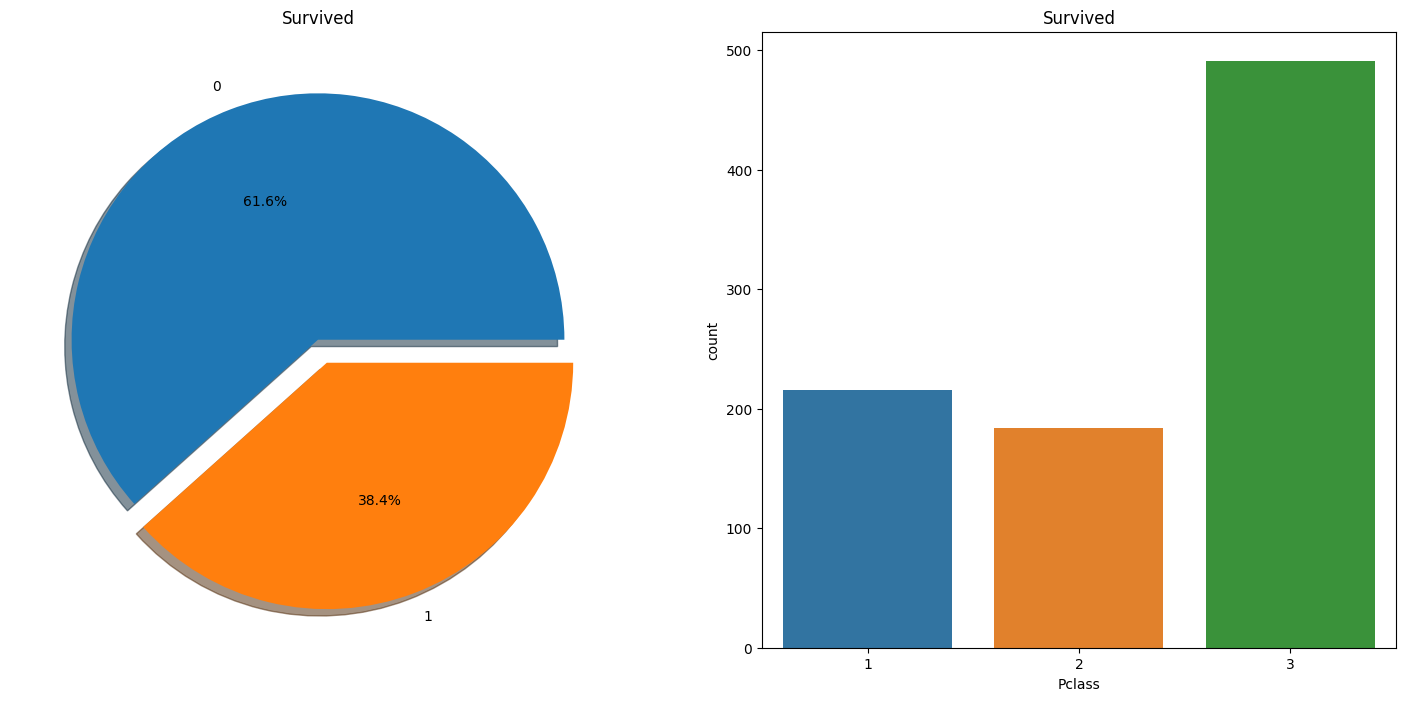

In [56]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
# sns.load_dataset("titanic")
sns.countplot(data=data, x=data["Pclass"], ax = ax[1])
    # data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

**[TODO] Sex를 categorical feature로 변환**

`groupby`를 이용하여 `Sex`별로 `Survived`의 갯수를 구합니다.

In [61]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

**[TODO] Sex별 생존 비율 및 수를 확인합니다.**

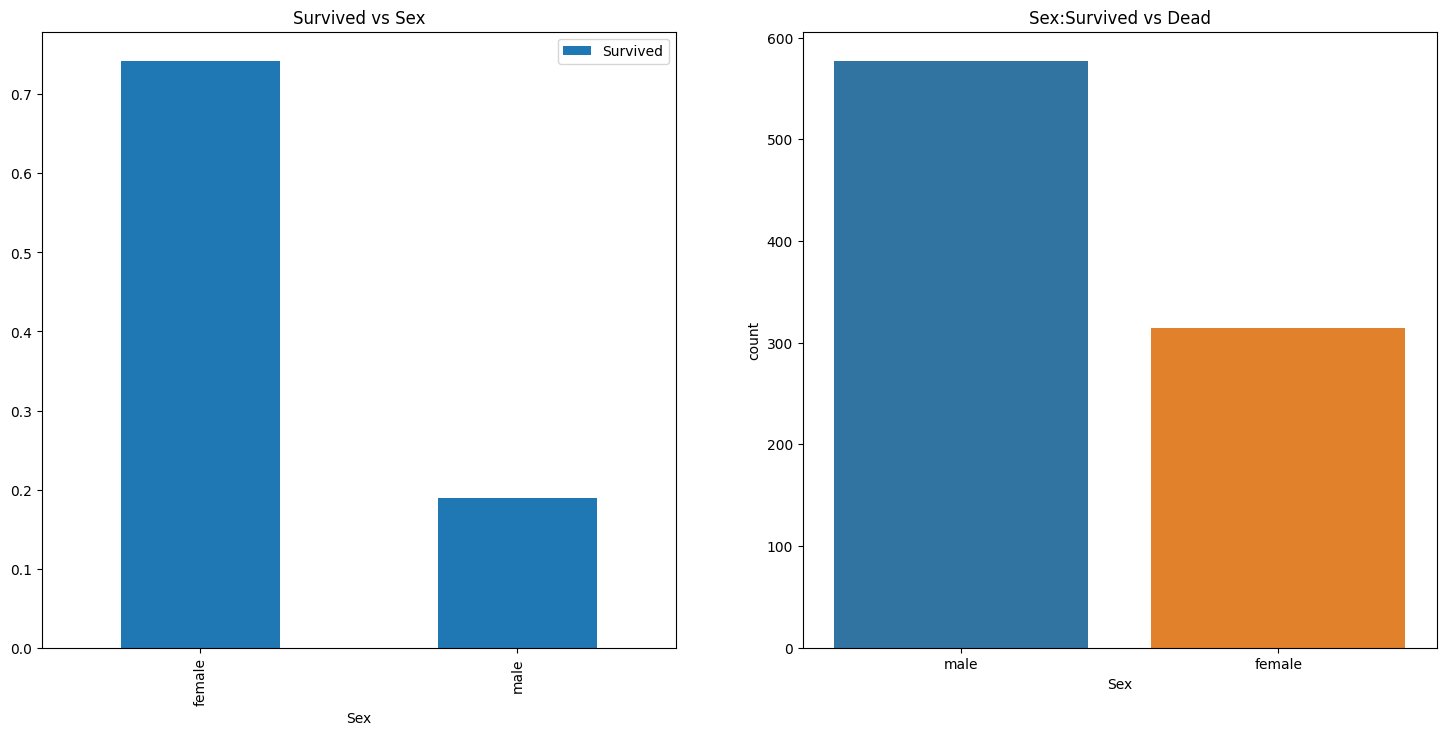

In [62]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(data=data, x= data['Sex'],ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

**Pclass별 생존, 사망 수를 확인합니다.**

`pd.crosstab`을 이용하여 `data.Pclass`, `data.Survived`의 교차표를 구합니다.

In [64]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r') # 총합을 보고싶을때 margins=True 옵션을 준다

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


**Pclass 별 생존, 사망의 카운트를 시각화 합니다.**

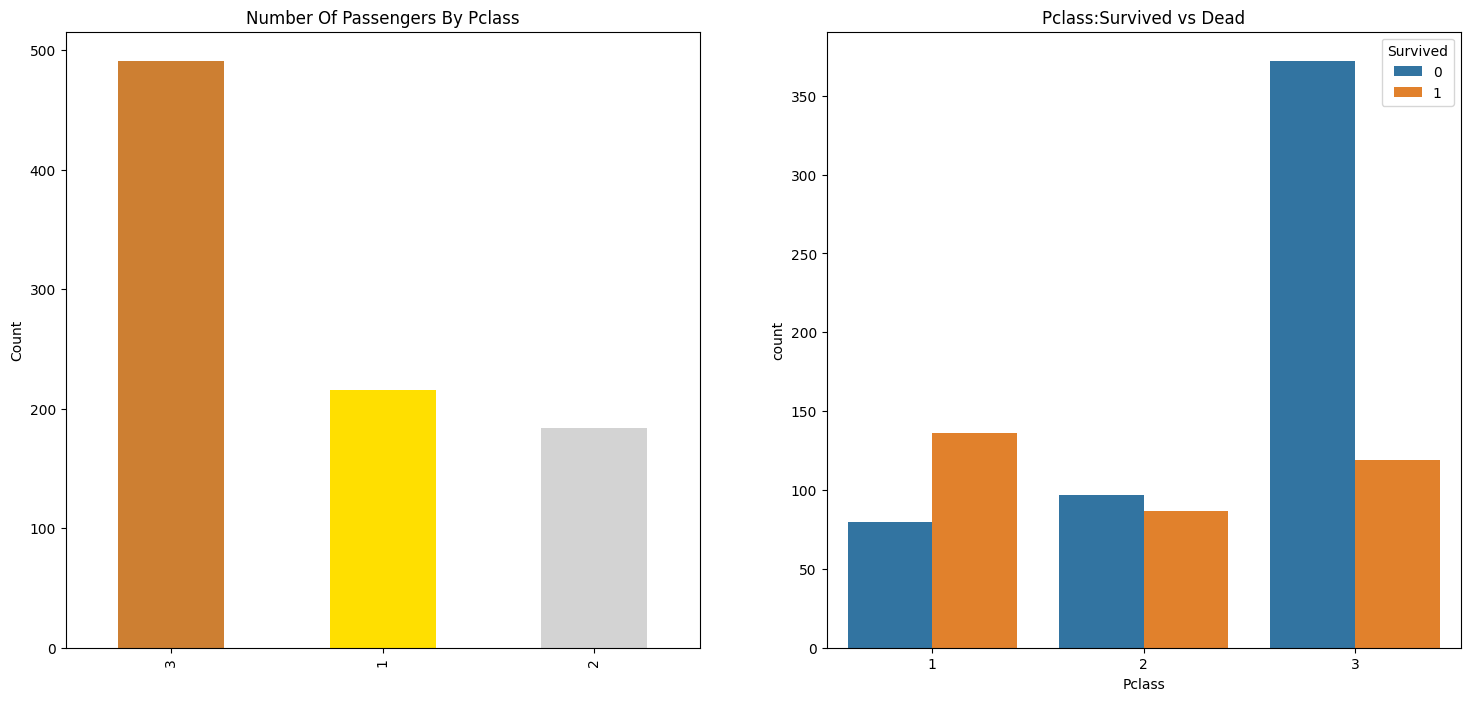

In [67]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(hue='Survived',data=data,x = data['Pclass'],ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

**[TODO] Sex, Pclass별 생존, 사망 수를 확인합니다.**

`pd.crosstab`을 이용하여 [`data.Sex`, `data.Survived`], `data.Pclass` 의 교차표를 구합니다.

In [68]:
pd.crosstab([data.Sex, data.Survived], data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

**SibSp별로 생존, 사망 수를 확인합니다.**

`pd.crosstab`을 이용하여 `data.SibSp`, `data.Survived`의 교차표를 구합니다.

In [69]:
pd.crosstab(data.SibSp, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


**Parch별로 생존, 사망 수를 확인합니다.**

`pd.crosstab`을 이용하여 `data.Parch`, `data.Survived`의 교차표를 구합니다.

In [70]:
pd.crosstab(data.Parch, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


**SibSp의 생존률을 라인 그래프로 확인합니다.**

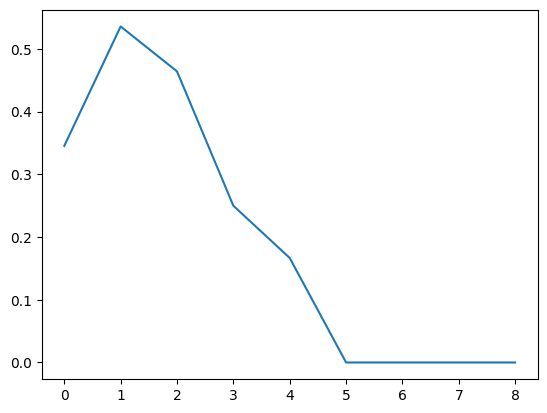

In [71]:
plt.plot(data.groupby("SibSp").Survived.mean())

**Parch의 생존률을 라인 그래프로 확인합니다.**

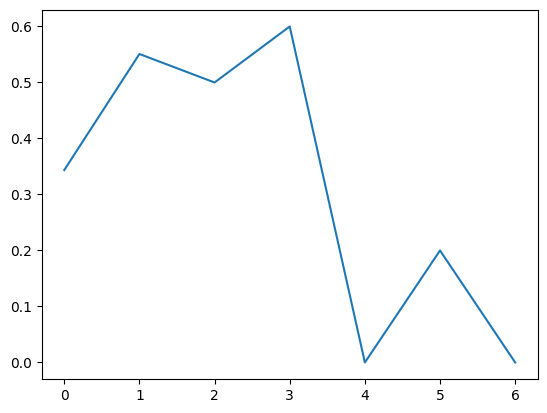

In [72]:
plt.plot(data.groupby("Parch").Survived.mean())

**Embarked의 생존률을 라인그래프로 확인합니다.**

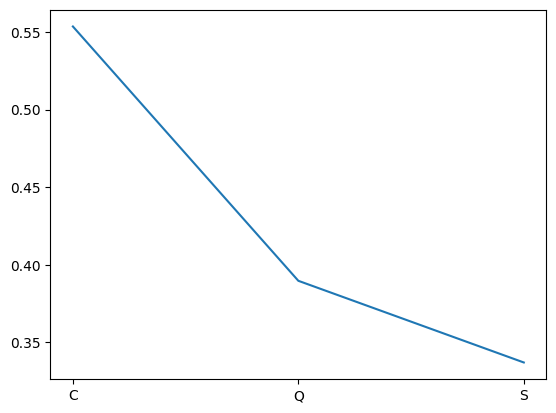

In [74]:
plt.plot(data.groupby("Embarked").Survived.mean())

**Fare_grade의 생존률을 라인그래프로 확인합니다.**

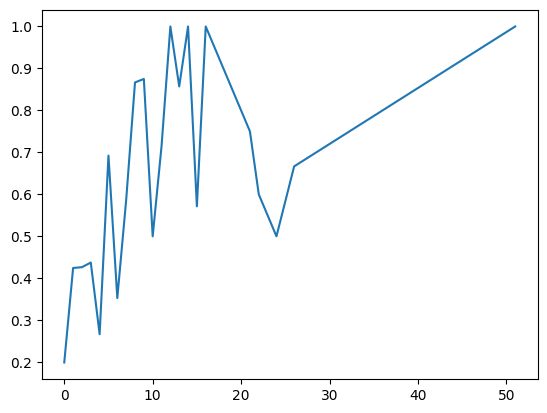

In [75]:
data["Fare_grade"] = (data.Fare / 10).astype(int)
plt.plot(data.groupby("Fare_grade").Survived.mean())

**SibSp, Pclass별 생존, 사망 수를 확인합니다.**


In [ ]:
pd.crosstab([data.SibSp, data.Survived], data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

**Parch, Pclass별 생존, 사망 수를 확인합니다.**

In [ ]:
pd.crosstab([data.Parch, data.Survived], data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

**[TODO] Embarked, Pclass별 생존, 사망 수를 확인합니다.**

In [ ]:
pd.crosstab([data.Embarked, data.Survived], data.Pclass,margins=True).style.background_gradient(cmap='summer_r')